## File to Check if data created is proper

In [30]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [88]:
# image_directory = '../../../skin/val/skin_val2019/'
# annotation_file = '../../../skin/val/instances_skin_val2019.json'

# image_directory = '../../../Input/Skin_Datasets/Coco_format/train/skin_train2019/'
# annotation_file = '../../../Input/Skin_Datasets/Coco_format/train/instances_skin_train2019.json'

image_directory = '../../../Input/Skin_Datasets/Coco_format/val/skin_val2019/'
annotation_file = '../../../Input/Skin_Datasets/Coco_format/val/instances_skin_val2019.json'

# image_directory = '../../../Input/Skin_Datasets/Coco_format/test/skin_test2019/'
# annotation_file = '../../../Input/Skin_Datasets/Coco_format/test/instances_skin_test2019.json'

# image_directory = '../../../coco-overall/val/skin_val2019/'
# annotation_file = '../../../coco-overall/val/instances_skin_val2019.json'

In [89]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [90]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))



Custom COCO categories: 
skin

Custom COCO supercategories: 
skin


In [95]:
category_ids = example_coco.getCatIds(catNms=['skin'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]


In [96]:
# image_ids
category_ids

[1]

In [97]:
image_data

{u'coco_url': u'',
 u'date_captured': u'2019-04-29 23:36:00.258441',
 u'file_name': u'000599.jpeg',
 u'flickr_url': u'',
 u'height': 480,
 u'id': 735,
 u'license': 1,
 u'width': 640}

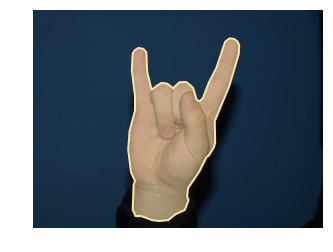

In [98]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
# pylab.rcParams['figure.figsize'] =rc (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)